In [12]:
from utils.classes import CellImage
from utils.helpers.helpers import get_images, show_images
from utils.helpers.enums import FilterAlg, ContoursDetectingAlg

In [13]:
images = [CellImage(image) for image in get_images('./cells_images/Provotorova/')]
for image in images:
    image.delete_description()

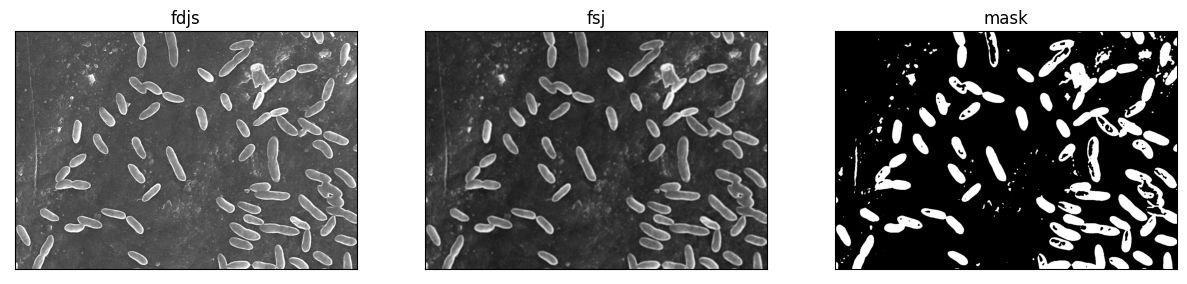

In [14]:
show_images([
    (images[1].image, 'fdjs'),
    (images[1].filter(alg_name=FilterAlg.GAUSSIAN, ksize=(11, 11)), 'fsj'),
    (images[1].detect_contours(alg_name=ContoursDetectingAlg.BY_HAND, threshold_value=130), 'mask')
], grid=(1, 3), size_inches=(15, 15))